In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_set = pd.read_csv('data//preprocessed_data.csv')
print(train_set.head())

   R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  hand  religion  orientation  \
0   1   1   2   4   1   2   2   1   5   5  ...     1         7            3   
1   1   4   1   4   1   4   1   2   4   4  ...     1         2            1   
2   4   2   2   2   2   2   3   2   2   2  ...     1        10            1   
3   1   1   4   2   1   1   1   1   3   3  ...     1         1            1   
4   5   3   3   3   3   3   3   3   5   5  ...     1        10            1   

   race  voted  married  familysize  uniqueNetworkLocation  source  \
0     4      1        2           3                      1       1   
1     1      2        1           3                      2       0   
2     1      2        1           6                      1       1   
3     4      1        1           3                      1       0   
4     3      1        1           3                      2       0   

                 major  
0          keperawatan  
1           matematika  
2  bimbingan konseling  
3   

In [22]:
# List of columns to drop
columns_to_drop = ['R3', 'I3', 'A7', 'S2', 'E2', 'C4', 'R5', 'I6', 'A1', 'S4', 'E6', 'C1', 'VCL9', 'VCL7', 'VCL8', 'VCL16', 'surveyelapse', 'testelapse', 'introelapse', 'source', 'uniqueNetworkLocation', 'hand', 'age', 'familysize', 'urban', 'race', 'married', 'orientation']

# Drop the columns
train_set = train_set.drop(columns=columns_to_drop)

In [32]:
print(train_set.columns)

Index(['R1', 'R2', 'R4', 'R6', 'R7', 'R8', 'I1', 'I2', 'I4', 'I5', 'I7', 'I8',
       'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'S1', 'S3', 'S5', 'S6', 'S7', 'S8',
       'E1', 'E3', 'E4', 'E5', 'E7', 'E8', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8',
       'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'education',
       'gender', 'engnat', 'religion', 'voted', 'major'],
      dtype='object')


In [8]:
print(train_set['major'].value_counts().head(60))

major
psikologi                        14255
manajemen bisnis                  4855
sastra inggris                    3459
keperawatan                       2564
akuntansi                         2531
biologi                           2431
kedoketeran                       2385
seni rupa                         1593
teknik informatika                1522
ilmu komunikasi                   1505
ilmu kesejahteraan sosial         1411
ekonomi                           1361
teknik sipil                      1290
hukum                             1290
kriminologi                       1181
sejarah                           1180
bimbingan konseling               1062
administrasi bisnis               1047
marketing                         1041
matematika                         968
sosiologi                          944
teknik mesin                       913
ilmu politik                       912
teknologi informasi                908
kimia                              903
manajemen          

In [12]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ --------------------------------- 41.0/258.3 kB ? eta -:--:--
   ------ --------------------------------- 41.0/258.3 kB ? eta -:--:--
   ---------------- --------------------- 112.6/258.3 kB 819.2 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 950.9 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 958.4 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.1 MB/s eta 0:00:00


In [30]:
from imblearn.over_sampling import SMOTE

X = train_set[['R1', 'R2', 'R4', 'R6', 'R7', 'R8', 'I1', 'I2', 'I4', 'I5', 'I7', 'I8', 'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'S1', 'S3', 'S5', 'S6', 'S7', 'S8', 'E1', 'E3', 'E4', 'E5', 'E7', 'E8', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'education', 'gender', 'engnat', 'religion', 'voted']]
y = train_set['major']

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

print(X_sm.shape, y_sm.shape)

(712750, 63) (712750,)


In [25]:
import pandas as pd

# Convert y_sm to a pandas Series if it's not already
y_sm_series = pd.Series(y_sm)

# Print the count of each class
print(y_sm_series.value_counts())

major
keperawatan                      14255
teknik lingkungan                14255
arsitektur                       14255
ilmu politik                     14255
kimia                            14255
biologi                          14255
pendidikan olahraga              14255
teknik informatika               14255
marketing                        14255
pg paud                          14255
kriminologi                      14255
farmasi                          14255
filsafat                         14255
matematika                       14255
teknik mesin                     14255
kedoketeran                      14255
jurnalistik                      14255
teknik biomedik                  14255
manajemen sumber daya manusia    14255
digital bisnis                   14255
hubungan internasional           14255
teknik elektro                   14255
teknik industri                  14255
geografi                         14255
pariwisata                       14255
teknik elektronika 

In [33]:
from imblearn.combine import SMOTEENN

# Create a SMOTEENN object
smote_enn = SMOTEENN(sampling_strategy='all')

# Resample the data
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Print the new class distribution
print(Counter(y_resampled))

KeyboardInterrupt: 

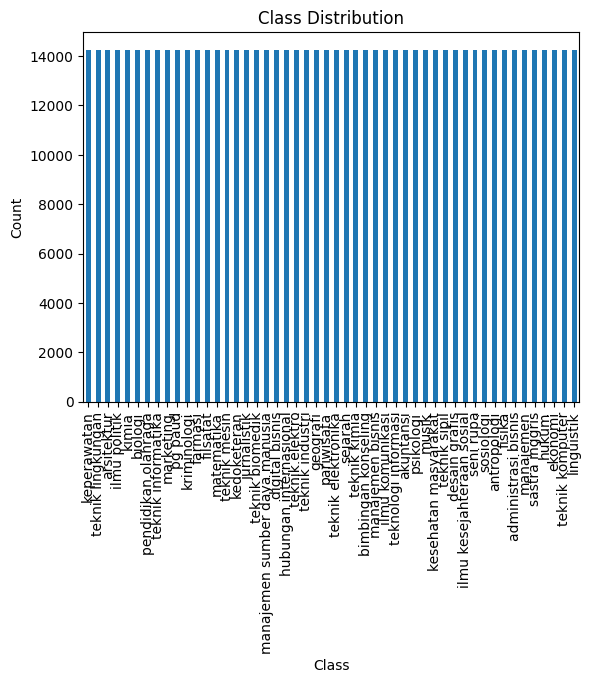

In [16]:
import matplotlib.pyplot as plt

# Plot the count of each class
y_sm_series.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

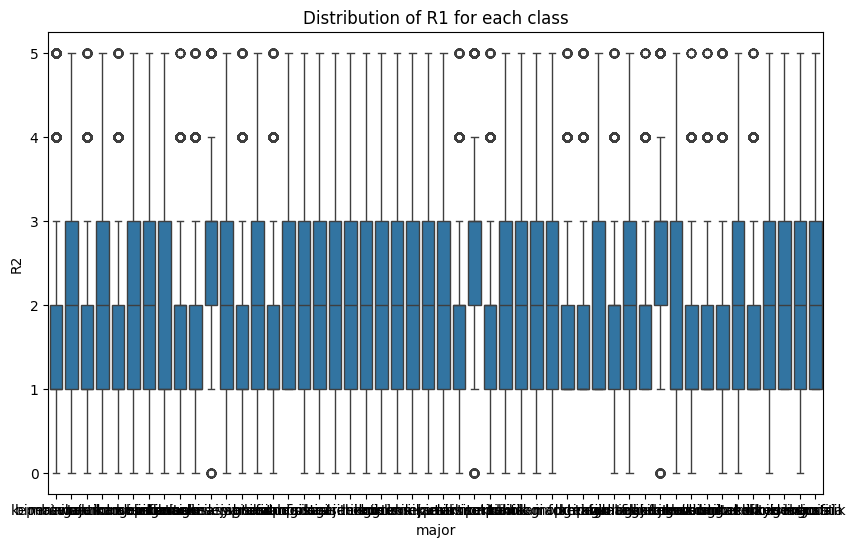

In [27]:
import seaborn as sns

# Create a DataFrame from the resampled data
df_sm = pd.DataFrame(X_sm, columns=X.columns)
df_sm['major'] = y_sm

# Plot the distribution of 'R1' with respect to the classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='major', y='R2', data=df_sm)
plt.title('Distribution of R1 for each class')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are your features and target after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy}")

Model accuracy: 0.23283760084180988
